# Mongabay Fire Tool

In this notebook we will perform all the data processing required for the [Fire tool](https://docs.google.com/document/d/1zpwxTejaSbb7tq3uFnwVx_fzysTMBZJvnJEhuDW4vAE/edit#).

For the fire alerts we will use the VIIRS alerts coming from GFW. 
[Here](https://www.globalforestwatch.org/dashboards/country/BRA/?category=fires&dashboardPrompts=eyJzaG93UHJvbXB0cyI6dHJ1ZSwicHJvbXB0c1ZpZXdlZCI6WyJkb3dubG9hZERhc2hib2FyZFN0YXRzIiwiZGFzaGJvYXJkQW5hbHlzZXMiLCJ3aWRnZXRTZXR0aW5ncyIsInNoYXJlV2lkZ2V0Il0sInNldHRpbmdzIjp7InNob3dQcm9tcHRzIjp0cnVlLCJwcm9tcHRzVmlld2VkIjpbImRvd25sb2FkRGFzaGJvYXJkU3RhdHMiLCJkYXNoYm9hcmRBbmFseXNlcyIsIndpZGdldFNldHRpbmdzIl0sInNldHRpbmdzIjp7InNob3dQcm9tcHRzIjp0cnVlLCJwcm9tcHRzVmlld2VkIjpbImRvd25sb2FkRGFzaGJvYXJkU3RhdHMiLCJkYXNoYm9hcmRBbmFseXNlcyIsIndpZGdldFNldHRpbmdzIl0sInNldHRpbmdzIjp7InNob3dQcm9tcHRzIjp0cnVlLCJwcm9tcHRzVmlld2VkIjpbImRvd25sb2FkRGFzaGJvYXJkU3RhdHMiLCJkYXNoYm9hcmRBbmFseXNlcyJdLCJzZXR0aW5ncyI6eyJzaG93UHJvbXB0cyI6dHJ1ZSwicHJvbXB0c1ZpZXdlZCI6W10sInNldHRpbmdzIjp7Im9wZW4iOmZhbHNlLCJzdGVwSW5kZXgiOjAsInN0ZXBzS2V5IjoiIn0sIm9wZW4iOnRydWUsInN0ZXBzS2V5IjoiZG93bmxvYWREYXNoYm9hcmRTdGF0cyJ9LCJvcGVuIjp0cnVlLCJzdGVwSW5kZXgiOjAsInN0ZXBzS2V5Ijoid2lkZ2V0U2V0dGluZ3MifSwic3RlcHNLZXkiOiJ3aWRnZXRTZXR0aW5ncyIsInN0ZXBJbmRleCI6LTEsImZvcmNlIjp0cnVlfSwib3BlbiI6dHJ1ZSwic3RlcEluZGV4IjowLCJzdGVwc0tleSI6InNoYXJlV2lkZ2V0In0sInN0ZXBzS2V5Ijoic2hhcmVXaWRnZXQiLCJmb3JjZSI6dHJ1ZX0%3D&fireAlertStats=eyJzdGFydEluZGV4IjowLCJlbmRJbmRleCI6NTEsInN0YXJ0RGF0ZUFic29sdXRlIjoiMjAyMC0xMS0zMCIsImVuZERhdGVBYnNvbHV0ZSI6IjIwMjEtMTEtMjIifQ%3D%3D&location=WyJjb3VudHJ5IiwiQlJBIl0%3D&map=eyJjZW50ZXIiOnsibGF0IjotMTUuMTI4MzAwNzgxNjIwNzUsImxuZyI6LTU0LjM5MDU3OTIxOTk5MjgxfSwiem9vbSI6My40OTg0NTEzMzAyNjUwNDUsImNhbkJvdW5kIjpmYWxzZSwiZGF0YXNldHMiOlt7ImRhdGFzZXQiOiJwb2xpdGljYWwtYm91bmRhcmllcyIsImxheWVycyI6WyJkaXNwdXRlZC1wb2xpdGljYWwtYm91bmRhcmllcyIsInBvbGl0aWNhbC1ib3VuZGFyaWVzIl0sImJvdW5kYXJ5Ijp0cnVlLCJvcGFjaXR5IjoxLCJ2aXNpYmlsaXR5Ijp0cnVlfSx7ImRhdGFzZXQiOiJmaXJlLWFsZXJ0cy12aWlycyIsImxheWVycyI6WyJmaXJlLWFsZXJ0cy12aWlycyJdLCJvcGFjaXR5IjoxLCJ2aXNpYmlsaXR5Ijp0cnVlLCJ0aW1lbGluZVBhcmFtcyI6eyJzdGFydERhdGVBYnNvbHV0ZSI6IjIwMjEtMDgtMjQiLCJlbmREYXRlQWJzb2x1dGUiOiIyMDIxLTExLTIyIiwic3RhcnREYXRlIjoiMjAyMS0wOC0yNCIsImVuZERhdGUiOiIyMDIxLTExLTIyIiwidHJpbUVuZERhdGUiOiIyMDIxLTExLTIyIn19XX0%3D&scrollTo=fireAlertStats&showMap=false&widget=fireAlertStats) an example of a chart with that data.

And here the endpoin to retrieve the data with a query example:

```
https://data-api.globalforestwatch.org/dataset/gadm__viirs__iso_weekly_alerts/v202105/query/json?sql=SELECT iso, alert__year, alert__week, SUM(alert__count) AS alert__count, confidence__cat FROM data WHERE iso = 'BRA' AND confidence__cat = 'h' and alert__year = 2021 GROUP BY iso, alert__year, alert__week, confidence__cat

```

For the precipitation data we will use the [CHIRPS Daily dataset from  GEE](https://developers.google.com/earth-engine/datasets/catalog/UCSB-CHG_CHIRPS_DAILY#description). Notice that this dataset doesn’t cover the whole world.


The chart will include the following elements:
- moving average of weekly precipitation.
- long-term average of weekly precipitation.
- Cumulative fire alerts
- long-term average of cumulative fire alerts.

The scope of the geographical data should be national (iso) or regional (adm1). 


# Setup
## Library import
We import all the required Python libraries

In [66]:
import os
import ee
import wxee
import geemap
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize
import xarray_leaflet
import ipyleaflet as ipyl
import json
import requests
import math
from datetime import timedelta

ee.Initialize()

# Data import
## [CHIRPS Daily dataset from  GEE](https://developers.google.com/earth-engine/datasets/catalog/UCSB-CHG_CHIRPS_DAILY#description)
**Automated conversion from Earth Engine JavaScripts to Python scripts**

In [17]:
js_dir = '/home/iker/Vizzuality/Proiektuak/sci_team_data_bank/Projects/mongabay/processing'
geemap.conversion.js_to_python_dir(in_dir=js_dir, out_dir=js_dir, use_qgis=True)
print("Python scripts saved at: {}".format(js_dir))

Converting Earth Engine JavaScripts to Python scripts...

Processing 1/1: /home/iker/Vizzuality/Proiektuak/sci_team_data_bank/Projects/mongabay/processing/reduceRegion.js
Python scripts saved at: /home/iker/Vizzuality/Proiektuak/sci_team_data_bank/Projects/mongabay/processing


### Read data from GEE

**Get geometry from geostore**

In [2]:
url = 'https://api.resourcewatch.org/v2/geostore/admin/BRA/22?thresh=0.05'

r = requests.get(url)
geometry = r.json().get('data').get('attributes').get('geojson')

aoi = ee.Geometry(geometry.get('features')[0].get('geometry'))

**Define dates**

In [158]:
today = pd.to_datetime('today').normalize()
nDays_year = pd.Period(today, freq='D').day_of_year
start_year_date = today - timedelta(days=nDays_year)
start_date = today - timedelta(days=nDays_year+61)
dates = pd.date_range(start_date, today,freq='D').astype(str)

**Breaks geometry into a grid**

In [4]:
# Script takes an arbitrary feature and breaks it into and n by n equal-area grid. 
# The grid is then clipped against the original geometry.

# Returns a featureCollection of Grids
 
# 'Based on code from':

# '- https':#gis.stackexchange.com/questions/231959/draw-a-grid-of-polygons-in-google-earth-engine
# '- https':#gis.stackexchange.com/questions/318959/get-lon-lat-of-a-top-left-corner-for-geometry-in-google-earth-engine/318983

#


# Function takes a feature and a grid dimension, n
def getClippedGrid(feat, n):

    # Get features bounds
    bounds = feat.bounds().geometry().bounds()

    # Get a list of coordinates
    listCoords = ee.Array.cat(bounds.coordinates(), 1)
    #print('Coords: ', listCoords)

    # get the x and y-coordinates as lists
    xCoords = listCoords.slice(1, 0, 1)
    yCoords = listCoords.slice(1, 1, 2)

    # reduce the arrays to find the max (or min) value (edges of grid)
    lon_start = xCoords.reduce('min', [0]).get([0,0]).getInfo(); print('xMin',lon_start)
    lon_end = xCoords.reduce('max', [0]).get([0,0]).getInfo(); print('xMax',lon_end)
    lat_start = yCoords.reduce('min', [0]).get([0,0]).getInfo(); print('yMin',lat_start)
    lat_end = yCoords.reduce('max', [0]).get([0,0]).getInfo(); print('yMax',lat_end)

    # and hence the number of grid cells
    num_cells = n*n
    lon_edge = (lon_end-lon_start)/math.sqrt(num_cells)
    lat_edge = (lat_end-lat_start)/math.sqrt(num_cells)
    #print('lon_edge',lon_edge)
    #print('lat_edge',lat_edge)

    # Create the grid bu adding each cell as a feature to a list
    polys = []
    cell_id = 0
    for lon in np.arange(lon_start, lon_end, lon_edge):
        x1 = lon
        x2 = lon + lon_edge
        for lat in np.arange(lat_start, lat_end, lat_edge):
            cell_id = cell_id + 1
            y1 = lat
            y2 = lat + lat_edge

            # label each grid for reference
            polys.append(ee.Feature(ee.Geometry.Rectangle(x1, y1, x2, y2), {'label': cell_id}))


    grid = ee.FeatureCollection(polys)

    # Crop the grid to orignial shape
    def func_woo(feature):

        feature = ee.Feature(feature)

        intersection = feature.intersection(feat, ee.ErrorMargin(1))
        return ee.Feature(intersection).set({'area': intersection.area().divide(1000 * 1000)})

    polyIntersect = grid.map(func_woo)
    return polyIntersect

In [5]:
# Create or Import a geometry (called geometry) and cast as a ee.Feature
feature = ee.Feature(aoi, {})

# Decide no. of (in this case: equally sized) cells across
n = 20

# Get grid
clipped_grid = getClippedGrid(feature, n)

Map = geemap.Map(center=(-20, -45), zoom=4)
Map.addLayer(feature, {'color': 'red'}, 'Original shape')
Map.addLayer(clipped_grid, {'color': 'blue', 'strokeWidth': 1}, 'Clipped grid', False)
Map

xMin -66.80650000000001
xMax -59.774300000000004
yMin -13.557600000000026
yMax -7.969299999999976


Map(center=[-20, -45], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(T…

**Read ImageCollection**

In [167]:
dataset = ee.ImageCollection('UCSB-CHG/CHIRPS/DAILY') \
                  .filter(ee.Filter.date(start_date.strftime('%Y-%m-%d'), today.strftime('%Y-%m-%d'))).filterBounds(aoi)

chirps = dataset.select('precipitation')

# Clip images with AoI
def func_vee(image):
    return image.clip(aoi)

#chirps = chirps.map(func_vee)

chirpsVis = {
    'min': 1.0,
    'max': 100.0,
    'palette': ['001137', '0aab1e', 'e7eb05', 'ff4a2d', 'e90000'],
  }

Map = geemap.Map(center=(-20, -45), zoom=4)
Map.addLayer(chirps, chirpsVis, 'Precipitation')
Map.addLayer(ee.Feature(aoi, {}), {'color': 'red'}, 'Original shape')
Map

Map(center=[-20, -45], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(T…

### Data analysis with `xarray`
**Convert the `ee.ImageCollection` to `xarray.DataArray` with [wxee](https://github.com/aazuspan/wxee)**

In [7]:
da = chirps.wx.to_xarray(scale=5566)
da

Requesting data: 100%|██████████| 304/304 [08:17<00:00,  1.63s/it]
ERROR 1: PROJ: proj_identify: /home/iker/anaconda3/envs/geoenv/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: proj_identify: /home/iker/anaconda3/envs/geoenv/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: proj_identify: /home/iker/anaconda3/envs/geoenv/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: proj_identify: /home/iker/anaconda3/envs/geoenv/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.LAYOUT.VERSION.MINOR metadata. It comes from another PROJ installation.
ERROR 1: PROJ: proj_identify: /home/iker/anaconda3/envs/geoenv/share/proj/proj.db lacks DATABASE.LAYOUT.VERSION.MAJOR / DATABASE.

<xarray.Dataset>
Dimensions:        (time: 304, y: 113, x: 142)
Coordinates:
  * time           (time) datetime64[ns] 2021-01-01 2021-01-02 ... 2021-10-31
  * y              (y) float64 -7.975 -8.025 -8.075 ... -13.48 -13.53 -13.58
  * x              (x) float64 -66.83 -66.78 -66.73 ... -59.88 -59.83 -59.78
Data variables:
    precipitation  (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan
Attributes:
    transform:               (0.050000228714092564, 0.0, -66.85030579074176, ...
    crs:                     +proj=longlat +datum=WGS84 +no_defs=True
    res:                     (0.050000228714092564, 0.050000228714092564)
    is_tiled:                1
    nodatavals:              (-32768.0,)
    scales:                  (1.0,)
    offsets:                 (0.0,)
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1

**Display data with `matplotlib`**

In [ ]:
fig, ax = plt.subplots(figsize=(15,7.5))

ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_global()

da['precipitation'].isel(time=-1).plot.pcolormesh(ax=ax, cmap='magma', transform=ccrs.PlateCarree(), x='x', y='y', add_colorbar=True)
ax.coastlines()

lon_min, lat_min, lon_max, lat_max = (-74, -34, -34, 5)
ax.set_ylim([lat_min-1,lat_max+1]);
ax.set_xlim([lon_min-1,lon_max+1]);

**Display data with `ipyleafle`**

In [5]:
import rioxarray
m = ipyl.Map()
l = da['precipitation'].isel(time=-1).leaflet.plot(m)
m.add_layer(l)
m

Url()

Map(center=[0.0, 0.0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

**Compute mean value over time**

In [1]:
mean_values = da['precipitation'].sum(['x', 'y']).values

NameError: name 'da' is not defined

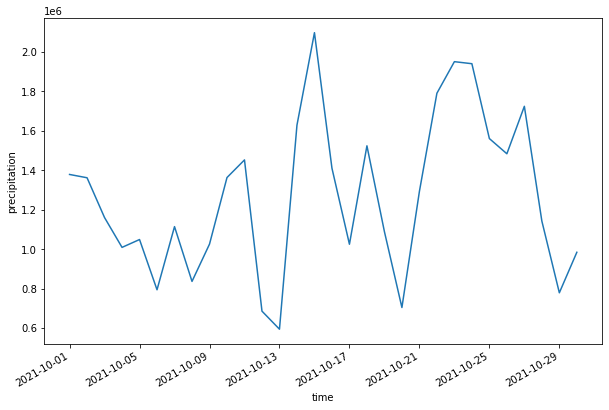

In [7]:
fig, ax = plt.subplots(figsize=(10,6))
da['precipitation'].sum(['x', 'y']).plot(ax=ax)

### Data analysis with `GEE`
**Get mean value over time**
Calling reduceRegions() with a very large or complex FeatureCollection as input may result in the dreaded "Computed value is too large" error. To prevent this issue here we will map reduceRegion() over the FeatureCollection instead as is suggested [here](https://developers.google.com/earth-engine/guides/best_practices#reduceregion-vs.-reduceregions-vs.-for-loop). 

In [144]:
def nestedMappedReducer(featureCol, imageCol):
    def mapReducerOverImgCol(feature):
        def imgReducer(image):
            return ee.Feature(feature.geometry().centroid(100),
                image.reduceRegion(
                    geometry = feature.geometry(),
                    reducer = ee.Reducer.mean(),
                    tileScale = 10,
                    maxPixels = 1e+13,
                    bestEffort = True 
                )).set({'date': image.date().format("YYYY-MM-dd")}).copyProperties(feature)

        return imageCol.map(imgReducer)

    return featureCol.map(mapReducerOverImgCol).flatten()

In [169]:
count = chirps.size()
data = nestedMappedReducer(ee.FeatureCollection(geometry.get('features')), chirps).toList(count).getInfo()

In [174]:
df_pre = pd.DataFrame(map(lambda x: x.get('properties'), data))

**Moving averages**

In [176]:
# 1 week moving average
df_pre['precipitation_w'] = df_pre[['date', 'precipitation']].rolling(window=7, center=True).mean()
# 2 month moving average
df_pre['precipitation_2m'] = df_pre[['date', 'precipitation']].rolling(window=61, center=True).mean()
# take current year days
df_pre = df_pre[(df_pre['date'] >= start_year_date.strftime('%Y-%m-%d')) & (df_pre['date'] <= today.strftime('%Y-%m-%d'))]

<AxesSubplot:xlabel='date'>

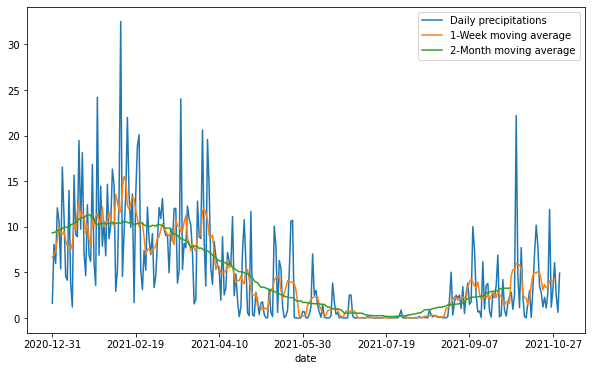

In [177]:
fig, ax = plt.subplots(figsize=(10,6))
df_pre.plot(ax=ax, x='date', y='precipitation', label = 'Daily precipitations')
df_pre.plot(ax=ax, x='date', y='precipitation_w' , label = '1-Week moving average')
df_pre.plot(ax=ax, x='date', y='precipitation_2m', label = '2-Month moving average')

##  VIIRS fire alerts

### **Daily alerts**

### National (iso)

In [114]:
iso = 'BRA'
confidence = 'h' #'n', 'l'

query =(f"SELECT alert__date, SUM(alert__count) AS alert__count \
        FROM data WHERE iso = \'{iso}\' AND confidence__cat = \'{confidence}\' AND alert__date >= \'{start_date}\' AND alert__date <= \'{today}\' \
        GROUP BY iso, alert__date, confidence__cat \
        ORDER BY alert__date"
)

url = f"https://data-api.globalforestwatch.org/dataset/gadm__viirs__adm2_daily_alerts/latest/query/json"

sql = {"sql": query}
r = requests.get(url, params=sql)

data = r.json().get('data')
df_fire = pd.DataFrame.from_dict(json_normalize(data))
# Fill missing dates with 0
df_fire = df_fire.set_index('alert__date').reindex(dates, fill_value=0).reset_index().rename(columns={'index': 'alert__date'})
df_fire.head()

/tmp/ipykernel_18157/527130961.py:16: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_fire = pd.DataFrame.from_dict(json_normalize(data))


,alert__date,alert__count
0,2020-10-31,0
1,2020-11-01,216
2,2020-11-02,167
3,2020-11-03,148
4,2020-11-04,223


**Moving averages**

In [115]:
# 1 week moving average
df_fire['alert__count_w'] = df_fire[['alert__date', 'alert__count']].rolling(window=7, center=True).mean()
# 2 month moving average
df_fire['alert__count_2m'] = df_fire[['alert__date', 'alert__count']].rolling(window=61, center=True).mean()
# take current year days
df_fire = df_fire[(df_fire['alert__date'] >= start_year_date.strftime('%Y-%m-%d')) & (df_fire['alert__date'] <= today.strftime('%Y-%m-%d'))]

<AxesSubplot:xlabel='alert__date'>

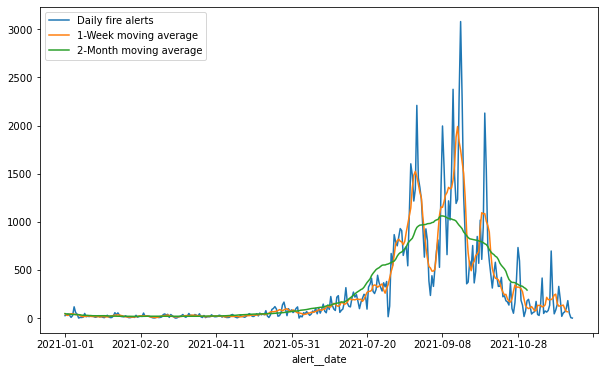

In [128]:
fig, ax = plt.subplots(figsize=(10,6))
df_fire.plot(ax=ax, x='alert__date', y='alert__count', label = 'Daily fire alerts')
df_fire.plot(ax=ax, x='alert__date', y='alert__count_w' , label = '1-Week moving average')
df_fire.plot(ax=ax, x='alert__date', y='alert__count_2m', label = '2-Month moving average')

**Cumulative fire alerts**

In [129]:
df_fire['alert__count_cumsum'] = df_fire[['alert__count']].cumsum()
df_fire['alert__count_cumsum_w'] = df_fire[['alert__count_w']].cumsum()
df_fire['alert__count_cumsum_2m'] = df_fire[['alert__count_2m']].cumsum()

<AxesSubplot:xlabel='alert__date'>

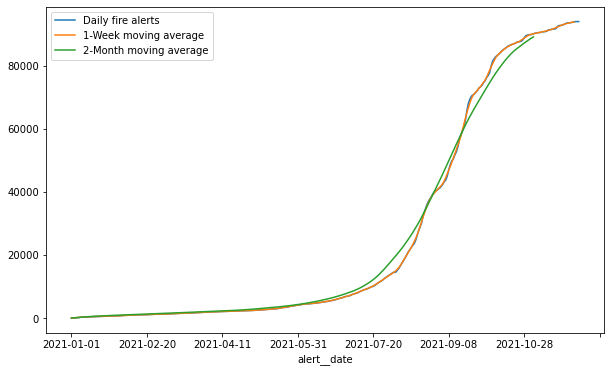

In [130]:
fig, ax = plt.subplots(figsize=(10,6))
df_fire.plot(ax=ax, x='alert__date', y='alert__count_cumsum', label = 'Daily fire alerts')
df_fire.plot(ax=ax, x='alert__date', y='alert__count_cumsum_w' , label = '1-Week moving average')
df_fire.plot(ax=ax, x='alert__date', y='alert__count_cumsum_2m', label = '2-Month moving average')

### Regional (admin1)

In [181]:
iso = 'BRA'
adm1 = 22
confidence = 'h' #'n', 'l'

query =(f"SELECT alert__date, SUM(alert__count) AS alert__count \
        FROM data WHERE iso = \'{iso}\' AND adm1::integer = {adm1} AND confidence__cat = \'{confidence}\' AND alert__date >= \'{start_date}\' AND alert__date <= \'{today}\' \
        GROUP BY iso, adm1, alert__date, confidence__cat \
        ORDER BY alert__date"
)

url = f"https://data-api.globalforestwatch.org/dataset/gadm__viirs__adm2_daily_alerts/latest/query/json"

sql = {"sql": query}
r = requests.get(url, params=sql)

data = r.json().get('data')
df_fire = pd.DataFrame.from_dict(json_normalize(data))
# Fill missing dates with 0
df_fire = df_fire.set_index('alert__date').reindex(dates, fill_value=0).reset_index().rename(columns={'index': 'alert__date'})
df_fire.head()

/tmp/ipykernel_18157/2632352999.py:17: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_fire = pd.DataFrame.from_dict(json_normalize(data))


,alert__date,alert__count
0,2020-10-31,0
1,2020-11-01,18
2,2020-11-02,13
3,2020-11-03,3
4,2020-11-04,13


**Moving averages**

In [182]:
# 1 week moving average
df_fire['alert__count_w'] = df_fire[['alert__date', 'alert__count']].rolling(window=7, center=True).mean()
# 2 month moving average
df_fire['alert__count_2m'] = df_fire[['alert__date', 'alert__count']].rolling(window=61, center=True).mean()
# take current year days
df_fire = df_fire[(df_fire['alert__date'] >= start_year_date.strftime('%Y-%m-%d')) & (df_fire['alert__date'] <= today.strftime('%Y-%m-%d'))]

<AxesSubplot:xlabel='alert__date'>

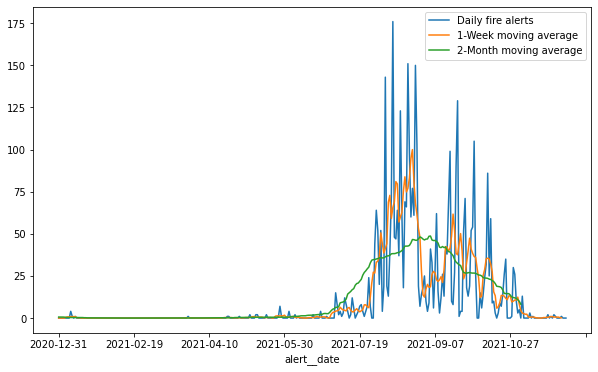

In [183]:
fig, ax = plt.subplots(figsize=(10,6))
df_fire.plot(ax=ax, x='alert__date', y='alert__count', label = 'Daily fire alerts')
df_fire.plot(ax=ax, x='alert__date', y='alert__count_w' , label = '1-Week moving average')
df_fire.plot(ax=ax, x='alert__date', y='alert__count_2m', label = '2-Month moving average')

### Regional (admin2)

In [135]:
iso = 'BRA'
adm1 = 22
adm2 = 6
confidence = 'h' #'n', 'l'

query =(f"SELECT alert__date, SUM(alert__count) AS alert__count \
        FROM data WHERE iso = \'{iso}\' AND adm1::integer = {adm1} AND adm2::integer = {adm2} AND confidence__cat = \'{confidence}\' AND alert__date >= \'{start_date}\' AND alert__date <= \'{today}\' \
        GROUP BY iso, adm1, adm2, alert__date, confidence__cat \
        ORDER BY alert__date"
)

url = f"https://data-api.globalforestwatch.org/dataset/gadm__viirs__adm2_daily_alerts/latest/query/json"

sql = {"sql": query}
r = requests.get(url, params=sql)

data = r.json().get('data')
df_fire = pd.DataFrame.from_dict(json_normalize(data))
# Fill missing dates with 0
df_fire = df_fire.set_index('alert__date').reindex(dates, fill_value=0).reset_index().rename(columns={'index': 'alert__date'})
df_fire.head()

/tmp/ipykernel_18157/1987728612.py:18: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_fire = pd.DataFrame.from_dict(json_normalize(data))


,alert__date,alert__count
0,2020-10-31,0
1,2020-11-01,0
2,2020-11-02,0
3,2020-11-03,0
4,2020-11-04,0


**Moving averages**

In [136]:
# 1 week moving average
df_fire['alert__count_w'] = df_fire[['alert__date', 'alert__count']].rolling(window=7, center=True).mean()
# 2 month moving average
df_fire['alert__count_2m'] = df_fire[['alert__date', 'alert__count']].rolling(window=61, center=True).mean()
# take current year days
df_fire = df_fire[(df_fire['alert__date'] >= start_year_date.strftime('%Y-%m-%d')) & (df_fire['alert__date'] <= today.strftime('%Y-%m-%d'))]

<AxesSubplot:xlabel='alert__date'>

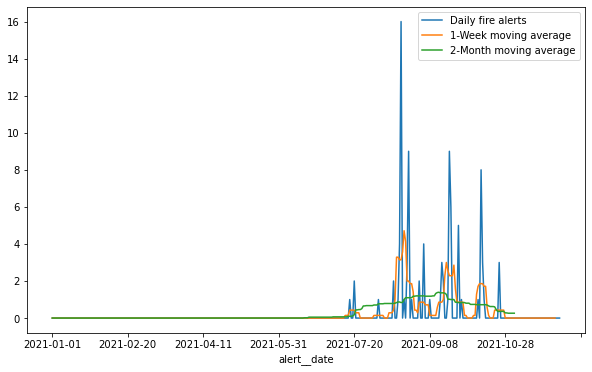

In [137]:
fig, ax = plt.subplots(figsize=(10,6))
df_fire.plot(ax=ax, x='alert__date', y='alert__count', label = 'Daily fire alerts')
df_fire.plot(ax=ax, x='alert__date', y='alert__count_w' , label = '1-Week moving average')
df_fire.plot(ax=ax, x='alert__date', y='alert__count_2m', label = '2-Month moving average')

##  Final widget examples

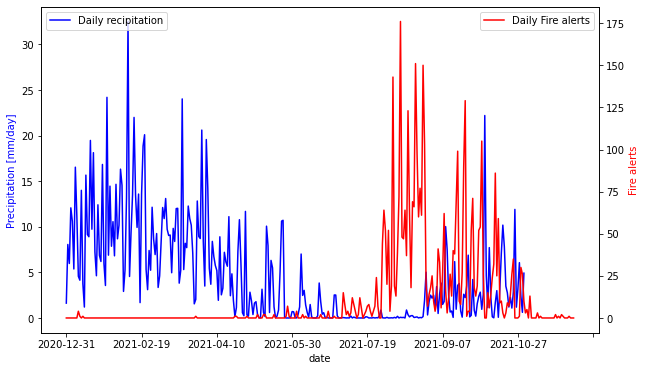

In [184]:
fig, ax = plt.subplots(figsize=(10,6))

ax2 = ax.twinx()
df_pre.plot(ax=ax, x='date', y='precipitation', color='b', label='Daily recipitation', legend=True)
df_fire.plot(ax=ax2, x='alert__date', y='alert__count', color='r', label='Daily Fire alerts', legend=True)

ax.legend(loc='upper left')
ax2.legend(loc='upper right')
ax.set_ylabel('Precipitation [mm/day]', color='b')
ax2.set_ylabel('Fire alerts', color='r')

plt.show()

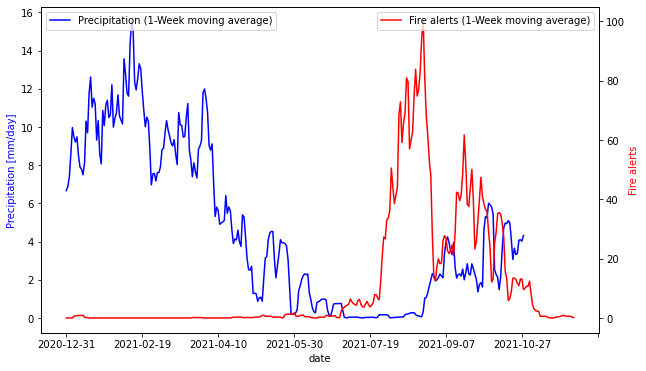

In [185]:
fig, ax = plt.subplots(figsize=(10,6))

ax2 = ax.twinx()
df_pre.plot(ax=ax, x='date', y='precipitation_w', color='b', label='Precipitation (1-Week moving average)', legend=True)
df_fire.plot(ax=ax2, x='alert__date', y='alert__count_w', color='r', label='Fire alerts (1-Week moving average)', legend=True)

ax.legend(loc='upper left')
ax2.legend(loc='upper right')
ax.set_ylabel('Precipitation [mm/day]', color='b')
ax2.set_ylabel('Fire alerts', color='r')

plt.show()

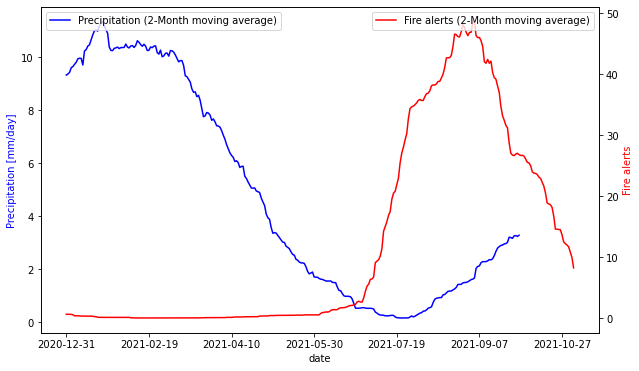

In [186]:
fig, ax = plt.subplots(figsize=(10,6))

ax2 = ax.twinx()
df_pre.plot(ax=ax, x='date', y='precipitation_2m', color='b', label='Precipitation (2-Month moving average)', legend=True)
df_fire.plot(ax=ax2, x='alert__date', y='alert__count_2m', color='r', label='Fire alerts (2-Month moving average)', legend=True)

ax.legend(loc='upper left')
ax2.legend(loc='upper right')
ax.set_ylabel('Precipitation [mm/day]', color='b')
ax2.set_ylabel('Fire alerts', color='r')

plt.show()